# Working with Plotly

In [1]:
import warnings
warnings.simplefilter('ignore')

Importing required libraries -

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df = pd.DataFrame()
help(df.iplot)

Help on method _iplot in module cufflinks.plotlytools:

_iplot(kind='scatter', data=None, layout=None, filename='', sharing=None, title='', xTitle='', yTitle='', zTitle='', theme=None, colors=None, colorscale=None, fill=False, width=None, dash='solid', mode='', interpolation='linear', symbol='circle', size=12, barmode='', sortbars=False, bargap=None, bargroupgap=None, bins=None, histnorm='', histfunc='count', orientation='v', boxpoints=False, annotations=None, keys=False, bestfit=False, bestfit_colors=None, mean=False, mean_colors=None, categories='', x='', y='', z='', text='', gridcolor=None, zerolinecolor=None, margin=None, labels=None, values=None, secondary_y='', secondary_y_title='', subplots=False, shape=None, error_x=None, error_y=None, error_type='data', locations=None, lon=None, lat=None, asFrame=False, asDates=False, asFigure=False, asImage=False, dimensions=None, asPlot=False, asUrl=False, online=None, **kwargs) method of pandas.core.frame.DataFrame instance
           Retur

In [5]:
df = pd.DataFrame(np.random.randn(50, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.733570,0.045799,-1.071913
1,-1.513062,-0.944733,1.274857
2,0.048054,-0.131078,0.687463
3,-1.361520,0.569270,0.412124
4,-0.762284,-0.836813,-1.035055


In [6]:
df.shape

(50, 3)

In [7]:
df['A'] = df['A'].cumsum()
df['B'] = df['B'].cumsum()
df['C'] = df['C'].cumsum()

<AxesSubplot:>

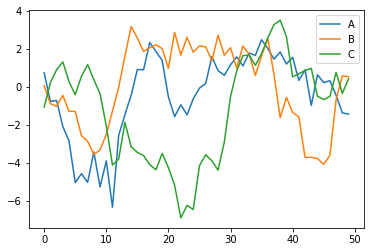

In [8]:
df.plot()

### Line Plot

In [9]:
df.iplot()

In [10]:
px.line(df)

In [11]:
df_stocks  = px.data.stocks()
df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [12]:
px.line(df_stocks, x='date', y='GOOG', labels={'date': 'Date', 'GOOG': 'Price'})

In [13]:
px.line(df_stocks, x='date', y=['GOOG', 'AAPL'], labels={'date': 'Date', 'value': 'Price'}, title='Apple vs. Google')

In [14]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.A, y=df.B, 
                         mode='lines', name='A vs B'))
fig.add_trace(go.Scatter(x=df.A, y=df.C, 
                         mode='markers', name='A vs C'))
fig.add_trace(go.Scatter(x=df.B, y=df.C, 
                         mode='lines+markers', name='B vs C',
                        line=dict(color='green', width=2,
                                 dash='dashdot')))

fig.update_layout(title="Plot",
                 xaxis_title="X",
                 yaxis_title="Y")

### Bar Chart

In [15]:
df_us = px.data.gapminder().query("country == 'United States'")
df_us.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1608,United States,Americas,1952,68.44,157553000,13990.48208,USA,840
1609,United States,Americas,1957,69.49,171984000,14847.12712,USA,840
1610,United States,Americas,1962,70.21,186538000,16173.14586,USA,840
1611,United States,Americas,1967,70.76,198712000,19530.36557,USA,840
1612,United States,Americas,1972,71.34,209896000,21806.03594,USA,840


In [16]:
px.bar(df_us, x='year', y='pop', labels={'year': 'Year', 'pop': 'Population'})

Stacked -

In [17]:
df_tips = px.data.tips()
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
px.bar(df_tips, x='day', y='tip', color='sex', title='Tips by Sex on each day', 
       labels={'tip': 'Tip Amount', 'day': 'Day of the Week'})

Grouped -

In [19]:
px.bar(df_tips, x='sex', y='tip', color='smoker', barmode='group')

### Scatter Plot

In [20]:
df_iris = px.data.iris()
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [21]:
px.scatter(df_iris, x='sepal_width', y='sepal_length', 
           color='species', size='petal_width', hover_data=['petal_length'])

In [22]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_iris.sepal_width, y=df_iris.sepal_length, 
                         mode='markers', marker_color=df_iris.sepal_width, text=df_iris.species, 
                         marker=dict(showscale=True)))

fig.update_traces(marker_size=10, marker_line_width=2, marker_line_color='black')

### Pie Chart

In [23]:
df_asia = px.data.gapminder().query("year == 2007 and continent == 'Asia' and lifeExp > 60")
df_asia.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
95,Bahrain,Asia,2007,75.635,708573,29796.048340,BHR,48
107,Bangladesh,Asia,2007,64.062,150448339,1391.253792,BGD,50
299,China,Asia,2007,72.961,1318683096,4959.114854,CHN,156
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.978670,HKG,344
707,India,Asia,2007,64.698,1110396331,2452.210407,IND,356


In [24]:
px.pie(df_asia, values='pop', names='country', title='Population of Asian Continent')

In [25]:
fig = go.Figure(data=[go.Pie(labels=['Water', 'Grass', 'Normal', 'Psychic', 'Fire', 'Ground'], 
                             values=[110, 90, 80, 80, 70, 60])])
fig

In [26]:
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', pull=[0.1, 0, 0.2, 0, 0, 0],
                  marker=dict(colors=['blue', 'green', 'black', 'purple', 'red', 'brown']))
fig

### Histogram

In [27]:
dice_1 = np.random.randint(1, 7, 5000)
dice_2 = np.random.randint(1, 7, 5000)
dice_sum = dice_1 + dice_2

fig = px.histogram(dice_sum, nbins=11, labels={'value': 'Dice Roll'}, title='5000 Dice Rolls',
                  color_discrete_sequence=['green'])
fig

In [28]:
fig.update_layout(yaxis_title_text='Dice Sum', bargap=0.2, showlegend=False)

Stacked -

In [29]:
px.histogram(df_tips, x='total_bill', color='sex')

### Box Plot

In [30]:
px.box(df_tips, x='sex', y='tip', points='all')

In [31]:
px.box(df_tips, x='day', y='tip', color='sex')

In [32]:
fig = go.Figure()
fig.add_trace(go.Box(x=df_tips.sex, y=df_tips.tip, marker_color='blue', boxmean='sd'))

### Violin Plot

In [33]:
px.violin(df_tips, y='total_bill', box=True, points='all')

In [34]:
px.violin(df_tips, y='tip', x='smoker', color='sex')

### Density Heatmaps

In [35]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [36]:
fig = px.density_heatmap(flights, x='year', y='month', z='passengers', 
                         marginal_x='histogram', marginal_y='rug')
fig

### 3D Scatter Plot

In [37]:
fig = px.scatter_3d(flights, x='year', y='month', z='passengers', 
                    color='year', opacity=0.75)
fig

### 3D Line Plot

In [38]:
fig = px.line_3d(flights, x='year', y='month', z='passengers', 
                    color='year')
fig

### Map Scatter Plot

In [39]:
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations='iso_alpha', 
                     color='continent', hover_name='country',
                     size='pop', projection='orthographic')
fig

### Polar Chart

In [40]:
df_wind = px.data.wind()
df_wind

,direction,strength,frequency
0,N,0-1,0.5
1,NNE,0-1,0.6
2,NE,0-1,0.5
3,ENE,0-1,0.4
4,E,0-1,0.4
...,...,...,...
123,WSW,6+,0.1
124,W,6+,0.9
125,WNW,6+,2.2
126,NW,6+,1.5


In [41]:
px.scatter_polar(df_wind, r='frequency', theta='direction',
                 color='strength', size='frequency')

In [42]:
px.line_polar(df_wind, r='frequency', theta='direction',
                 color='strength', line_close=True)

### Ternary Plot

In [43]:
df_exp = px.data.experiment()
df_exp

,experiment_1,experiment_2,experiment_3,gender,group
0,96.876065,93.417942,73.033193,male,control
1,87.301336,129.603395,66.056554,female,control
2,97.691312,106.187916,103.422709,male,treatment
3,102.978152,93.814682,56.995870,female,treatment
4,87.106993,107.019985,72.140292,male,control
...,...,...,...,...,...
95,108.156964,105.971541,64.524029,female,treatment
96,91.739992,111.125377,64.260993,male,control
97,95.410347,84.448322,75.505991,female,control
98,106.362406,115.522382,123.469689,male,treatment


In [44]:
px.scatter_ternary(df_exp, a='experiment_1', b='experiment_2', c='experiment_3',
                   hover_name='group', color='gender')

### Facet Plot

In [45]:
fig = px.scatter(df_tips, x='total_bill', y='tip', color='sex',
                 facet_col='day', facet_row='smoker')
fig

### Animation Plot

In [46]:
df_cnt = px.data.gapminder()
df_cnt

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [47]:
px.scatter(df_cnt, x='gdpPercap', y='lifeExp',
           animation_frame='year', animation_group='country',
           size='pop', color='continent', 
           range_x=[100, 10000], range_y=[25, 90])

In [48]:
px.bar(df_cnt, x='continent', y='pop', color='continent',
       animation_frame='year',
       range_y=[0, 4000000000])